new image height:  135
new image width:  154
tensor([[0.2471, 0.2510, 0.2549,  ..., 0.5922, 0.7490, 0.6667]])
torch.Size([1, 62370])
Epoch 0, Loss: 0.050009
Epoch 50, Loss: 0.000076


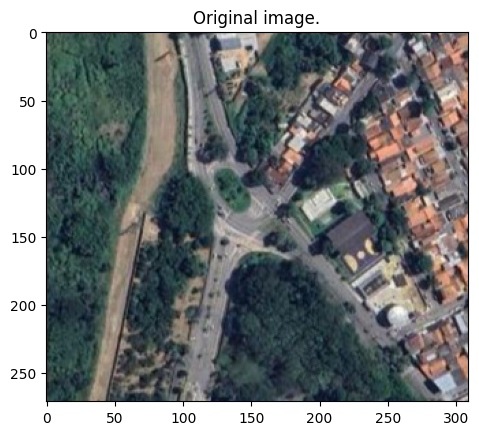

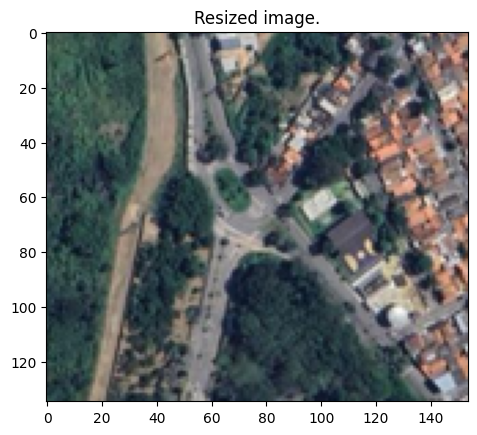

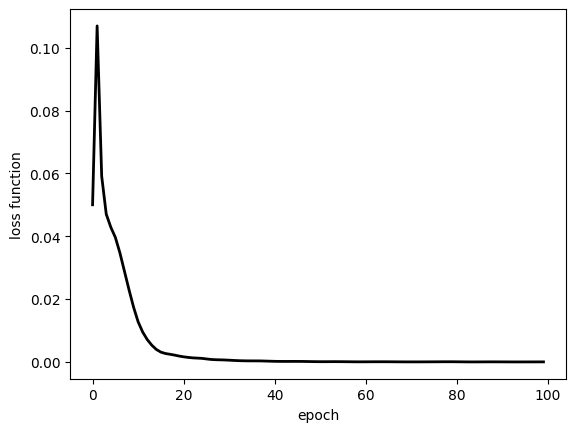

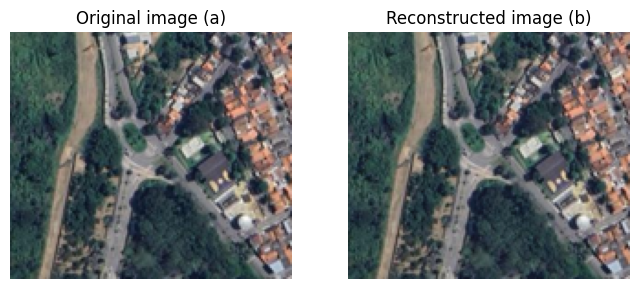

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from autoencoder_model import Autoencoder

# Here we open and load INPE RGB Image (BMP format)
file_name = "data/inpe.bmp"
img_orig = Image.open(file_name).convert("RGB") 
plt.figure()
plt.imshow(img_orig)
plt.title("Original image.")

# If resizing is required, here we  set the parameters
scale_factor_x = 0.5
scale_factor_y = 0.5
width = int( img_orig.size[0] * scale_factor_x)
height = int( img_orig.size[1] * scale_factor_y)

# We can also set new inputs manually:
# width = 
# height = 

print("new image height: ", height)
print("new image width: ", width)

img = img_orig.resize((width, height))  # image resizing, only for fast execution time
plt.figure()
plt.imshow(img)
plt.title("Resized image.")

transform = transforms.ToTensor()
# Shape [1, 3, height, width] from a pil image format
# First dimension corresponds to batch size = 1.
img_tensor = transform(img).unsqueeze(0) # new dimension insertion 

img_flat = img_tensor.view(1, -1)  # shape: (1, 3* height * width)
print(img_flat)
print(img_flat.size())


# Here we use our Autoencoder implemented with a MPL
seed = 10
torch.manual_seed(seed)

model = Autoencoder(img_flat.size()[1], [256, 64])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)


# Now we train our autoencoder
epoch_mse = []
n_epochs = 100
for epoch in range(n_epochs):
    output = model(img_flat)
    loss = criterion(output, img_flat)
    optimizer.zero_grad() # Here we clean previously calculated gradients
    loss.backward()
    optimizer.step()
    epoch_mse.append(loss.item())
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

plt.figure()
plt.plot(epoch_mse, color="black", linewidth=2)
plt.xlabel("epoch")
plt.ylabel("loss function")


# Here we reconstruct the original image using the trained autoencoder network
with torch.no_grad():
    reconstructed = model(img_flat).view(3, height, width)

# Numpy conversion
# We change the original order  (channel, height, width - 0, 1, 2 ) to (height, width, channel - 1, 2, 0)
# and after to numpy format, to be used with pyplot
orig_np = img_tensor.squeeze().permute(1, 2, 0).numpy() # here we change vector 
recon_np = reconstructed.permute(1, 2, 0).numpy()

# Original and reconstructed image visualization.
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original image (a)")
plt.imshow(orig_np)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Reconstructed image (b)")
plt.imshow(recon_np)
plt.axis('off')
plt.show()

